# Lab | Hypothesis Testing

**Objective**

Welcome to the Hypothesis Testing Lab, where we embark on an enlightening journey through the realm of statistical decision-making! In this laboratory, we delve into various scenarios, applying the powerful tools of hypothesis testing to scrutinize and interpret data.

From testing the mean of a single sample (One Sample T-Test), to investigating differences between independent groups (Two Sample T-Test), and exploring relationships within dependent samples (Paired Sample T-Test), our exploration knows no bounds. Furthermore, we'll venture into the realm of Analysis of Variance (ANOVA), unraveling the complexities of comparing means across multiple groups.

So, grab your statistical tools, prepare your hypotheses, and let's embark on this fascinating journey of exploration and discovery in the world of hypothesis testing!

**Challenge 1**

In this challenge, we will be working with pokemon data. The data can be found here:

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv

In [1]:
#libraries
import pandas as pd
import scipy.stats as st
import numpy as np



In [3]:
df = pd.read_csv("/Users/jon/Desktop/Ironhack/Unit 4 - Statistics & Probability/lab-hypothesis-testing/pokemon.csv")
df

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [7]:
#see unique values of Type 1 & Type 2
print(df['Type 1'].unique())
print(df['Type 2'].unique())

#See if there are any Name that are Type 1 Dragon and Type 2 Grass or vice versa
df[(df['Type 1'] == 'Dragon') & (df['Type 2'] == 'Grass') | (df['Type 1'] == 'Grass') & (df['Type 2'] == 'Dragon')]

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
275,Mega Sceptile,Grass,Dragon,70,110,75,145,85,145,3,False


- We posit that Pokemons of type Dragon have, on average, more HP stats than Grass. Choose the propper test and, with 5% significance, comment your findings.

In [10]:
#test if variances are equal or unequal

from scipy.stats import levene

dragons = df[(df['Type 1'] == 'Dragon') | (df['Type 2'] == 'Dragon')]
grasses = df[(df['Type 1'] == 'Grass') | (df['Type 2'] == 'Grass')]


# Assume Dragon and Grass Pokemons are have equal variances
stat, p = levene(dragons["HP_variance"], grasses["HP_variance"])

if p < 0.05:
    print("Variances are significantly different (reject H0). Use Welch's t-test.")
else:
    print("Variances are not significantly different (fail to reject H0). Use Student's t-test.")


Variances are not significantly different (fail to reject H0). Use Student's t-test.


In [11]:
#Test if the means of HP are significantly different between Dragon and Grass Pokemons
from scipy.stats import ttest_ind

stat, p = ttest_ind(dragons["HP"], grasses["HP"], equal_var=True)
if p < 0.05:
    print("Means are significantly different (reject H0).")
else:
    print("Means are not significantly different (fail to reject H0).")

Means are significantly different (reject H0).


/var/folders/_2/ksgd3nl52j9g0sxwpjjd1bgh0000gn/T/ipykernel_4060/3229834913.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x="Group", y="HP", palette="Set2")


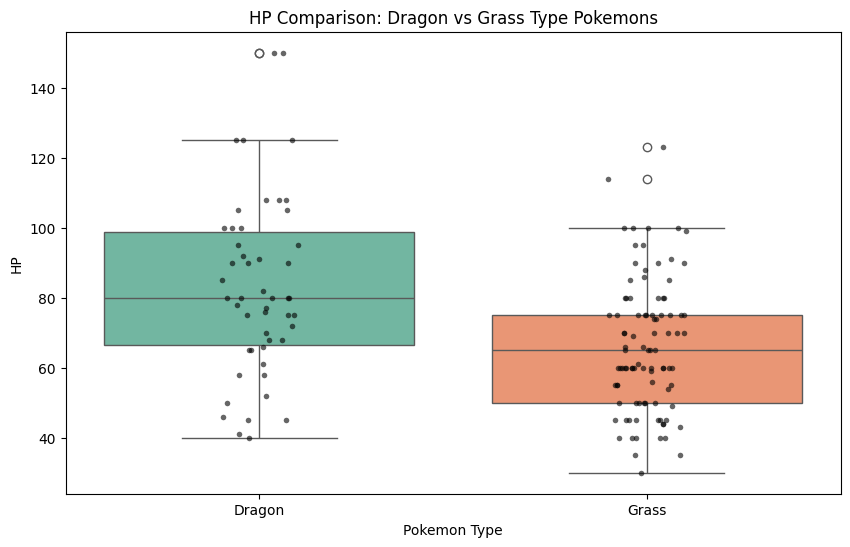

In [12]:
#Visualize the distribution of HP for Dragon and Grass Pokemons

import seaborn as sns
import matplotlib.pyplot as plt

#Create a new dataframe to label the groups

dragons = df[(df["Type 1"]=="Dragon")| (df["Type 2"]=="Dragon")].copy()
dragons["Group"] = "Dragon"

grasses = df[(df["Type 1"]=="Grass")| (df["Type 2"]=="Grass")].copy()
grasses["Group"] = "Grass"

# Combine the two groups

combined = pd.concat([dragons, grasses])

#Plot

plt.figure(figsize=(10,6))
sns.boxplot(data=combined, x="Group", y="HP", palette="Set2")
sns.stripplot(data=combined, x="Group", y="HP", color="black", size=4, jitter=True, alpha=0.6)
plt.title("HP Comparison: Dragon vs Grass Type Pokemons")
plt.ylabel("HP")
plt.xlabel("Pokemon Type")
plt.show()






- We posit that Legendary Pokemons have different stats (HP, Attack, Defense, Sp.Atk, Sp.Def, Speed) when comparing with Non-Legendary. Choose the propper test and, with 5% significance, comment your findings.


In [13]:
#code here

df

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [26]:
df_metrics=df.drop(columns=['Name', 'Type 1', 'Type 2', 'Generation'])

df_metrics

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,45,49,49,65,65,45,False
1,60,62,63,80,80,60,False
2,80,82,83,100,100,80,False
3,80,100,123,122,120,80,False
4,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,True
796,50,160,110,160,110,110,True
797,80,110,60,150,130,70,True
798,80,160,60,170,130,80,True


In [27]:
for col in df_metrics.columns:
    #Seperate the values for Legendary and Non-Legendary Pokemons
    legendary_vals=df_metrics[df_metrics["Legendary"]==True][col]
    non_legendary_vals = df_metrics[df_metrics["Legendary"]==False][col]
    
    #Perform the t-test
    stat, p = ttest_ind(legendary_vals, non_legendary_vals, equal_var=True)

    #Print the results
    print(f"Column: {col}")
    print(f"t-statistic_ {stat:.3f}")
    print(f"p-value: {p:.4f}")

    if p < 0.05:
        print("Means are significantly differnet (we reject H0)")
    else:
        print("Means are not significantly different (we don't reject H0)")

Column: HP
t-statistic_ 8.036
p-value: 0.0000
Means are significantly differnet (we reject H0)
Column: Attack
t-statistic_ 10.397
p-value: 0.0000
Means are significantly differnet (we reject H0)
Column: Defense
t-statistic_ 7.181
p-value: 0.0000
Means are significantly differnet (we reject H0)
Column: Sp. Atk
t-statistic_ 14.191
p-value: 0.0000
Means are significantly differnet (we reject H0)
Column: Sp. Def
t-statistic_ 11.038
p-value: 0.0000
Means are significantly differnet (we reject H0)
Column: Speed
t-statistic_ 9.765
p-value: 0.0000
Means are significantly differnet (we reject H0)
Column: Legendary
t-statistic_ -inf
p-value: nan
Means are not significantly different (we don't reject H0)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


/var/folders/_2/ksgd3nl52j9g0sxwpjjd1bgh0000gn/T/ipykernel_4060/2321806167.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x='Group', y='Value', palette='Set2')


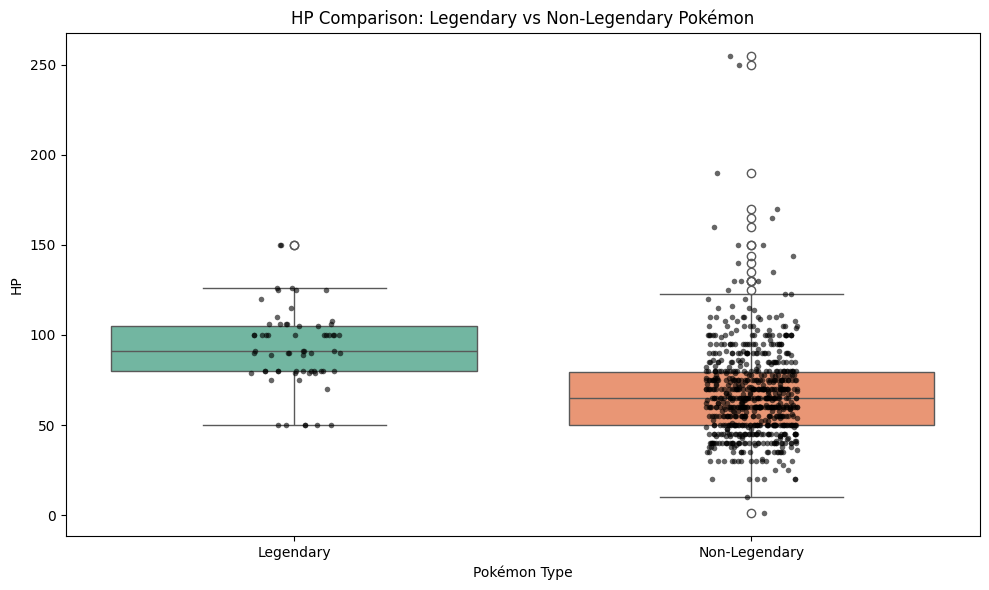

/var/folders/_2/ksgd3nl52j9g0sxwpjjd1bgh0000gn/T/ipykernel_4060/2321806167.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x='Group', y='Value', palette='Set2')


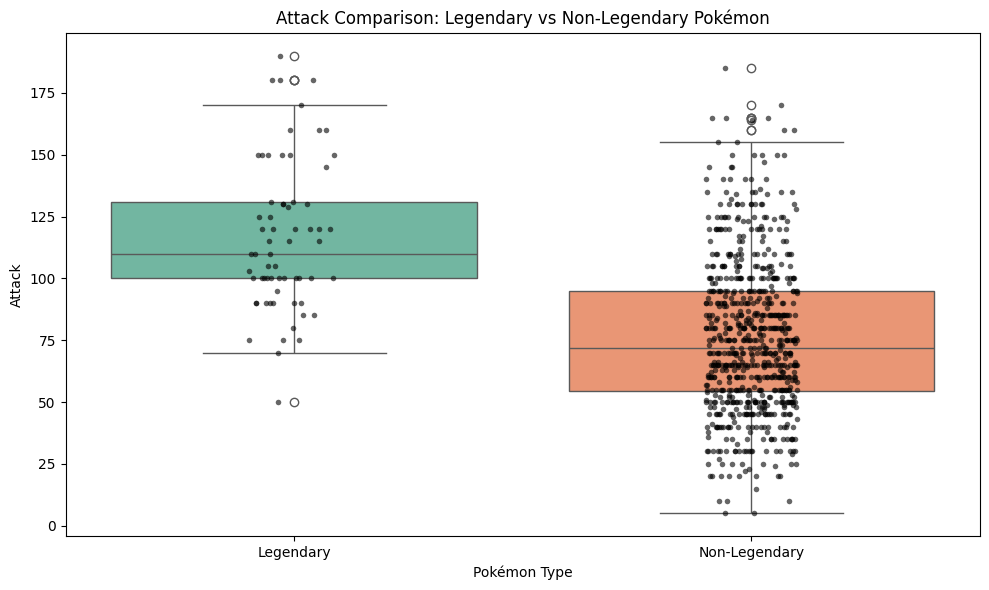

/var/folders/_2/ksgd3nl52j9g0sxwpjjd1bgh0000gn/T/ipykernel_4060/2321806167.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x='Group', y='Value', palette='Set2')


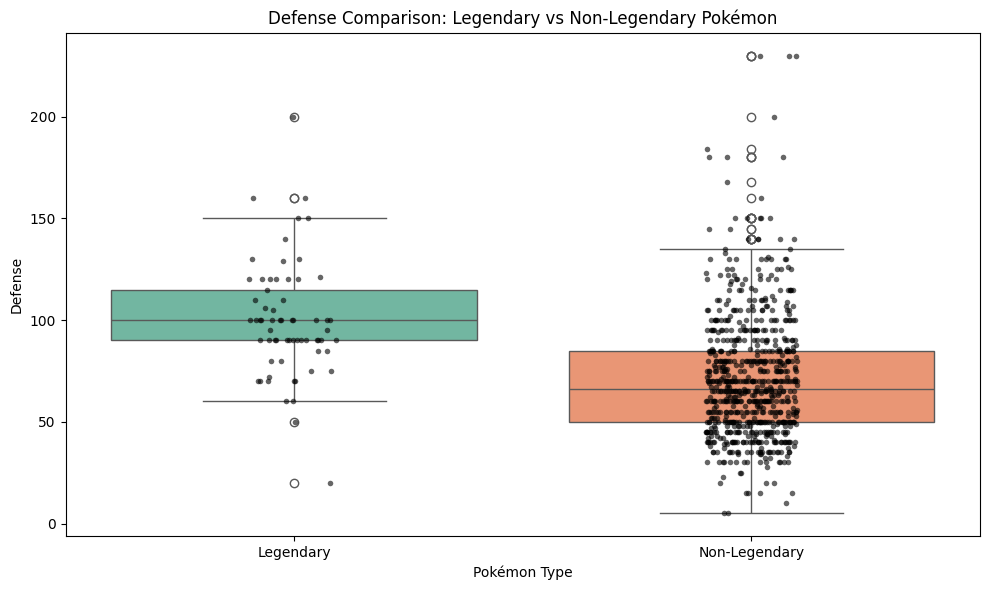

/var/folders/_2/ksgd3nl52j9g0sxwpjjd1bgh0000gn/T/ipykernel_4060/2321806167.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x='Group', y='Value', palette='Set2')


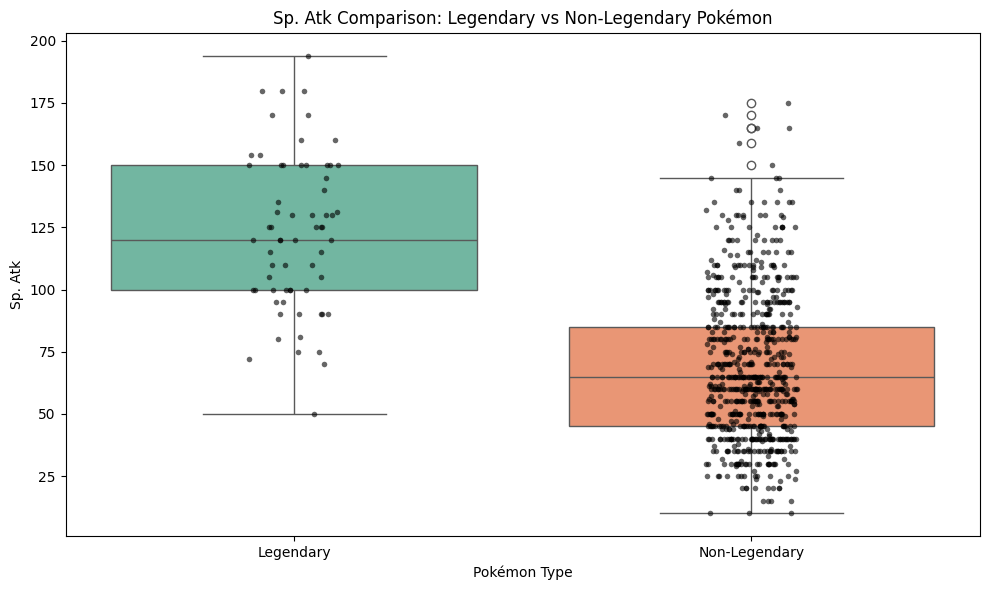

/var/folders/_2/ksgd3nl52j9g0sxwpjjd1bgh0000gn/T/ipykernel_4060/2321806167.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x='Group', y='Value', palette='Set2')


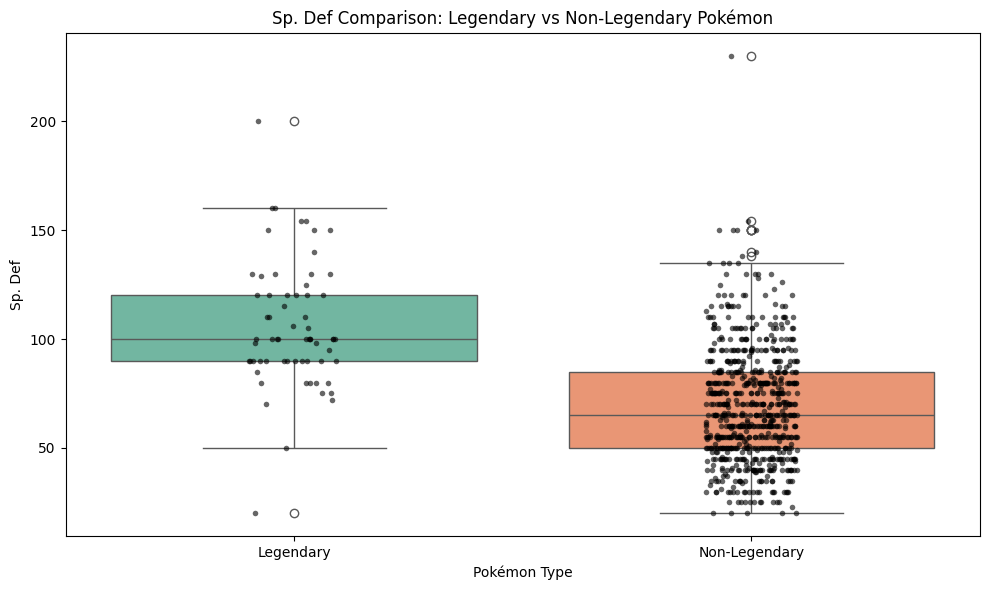

/var/folders/_2/ksgd3nl52j9g0sxwpjjd1bgh0000gn/T/ipykernel_4060/2321806167.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x='Group', y='Value', palette='Set2')


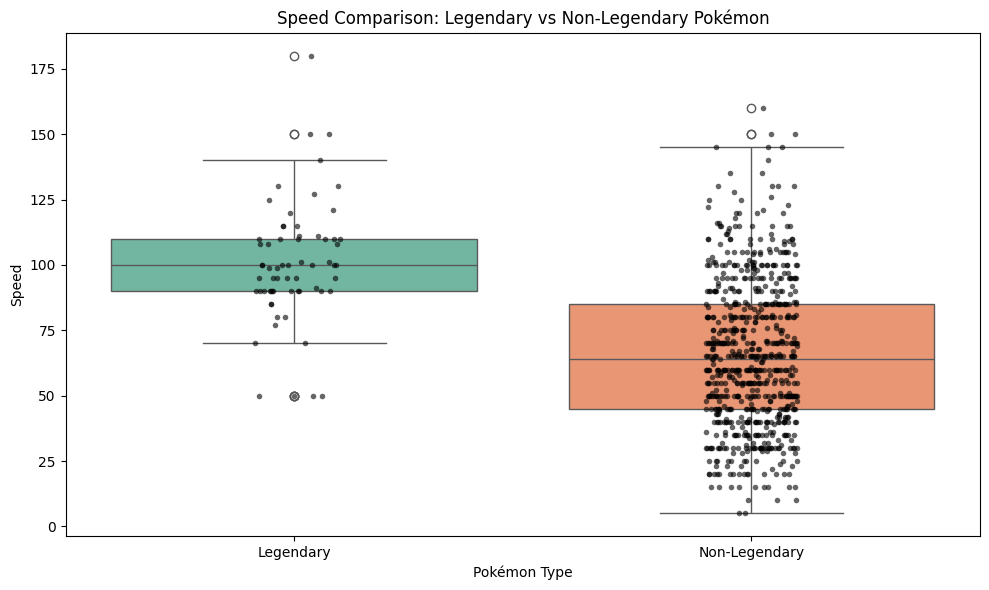

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# List numeric columns except 'Legendary'
numeric_cols = df_metrics.select_dtypes(include='number').columns.tolist()

for col in numeric_cols:
    # Create labeled groups
    legendary_group = df_metrics[df_metrics['Legendary'] == True][[col]].copy()
    legendary_group['Group'] = 'Legendary'
    
    non_legendary_group = df_metrics[df_metrics['Legendary'] == False][[col]].copy()
    non_legendary_group['Group'] = 'Non-Legendary'
    
    combined = pd.concat([legendary_group, non_legendary_group])
    combined.rename(columns={col: 'Value'}, inplace=True)  # rename for consistent plotting
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=combined, x='Group', y='Value', palette='Set2')
    sns.stripplot(data=combined, x='Group', y='Value', color='black', size=4, jitter=True, alpha=0.6)
    
    plt.title(f'{col} Comparison: Legendary vs Non-Legendary Pokémon')
    plt.xlabel('Pokémon Type')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


**Challenge 2**

In this challenge, we will be working with california-housing data. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv

In [29]:
df = pd.read_csv("/Users/jon/Desktop/Ironhack/Unit 4 - Statistics & Probability/lab-hypothesis-testing/california_housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**We posit that houses close to either a school or a hospital are more expensive.**

- School coordinates (-118, 34)
- Hospital coordinates (-122, 37)

We consider a house (neighborhood) to be close to a school or hospital if the distance is lower than 0.50.

Hint:
- Write a function to calculate euclidean distance from each house (neighborhood) to the school and to the hospital.
- Divide your dataset into houses close and far from either a hospital or school.
- Choose the propper test and, with 5% significance, comment your findings.
 

In [30]:
import numpy as np

In [37]:
school_lon, school_lat = -118, 34
hospital_lon, hospital_lat = -122, 37

#calculate Euclidean distances to school and hospital
dist_to_school = np.sqrt((df["longitude"]-school_lon)**2 + (df["latitude"]-school_lat)**2)
dist_to_hospital = np.sqrt((df["longitude"]-hospital_lon)**2 + (df["latitude"]-hospital_lat)**2)

# Boolean mask: True if close to scjhool or hospital

close_mask= (dist_to_school < 0.5) | (dist_to_hospital < 0.5)

#Create 2 dataframes

df_close = df[close_mask].copy()
df_far = df[~close_mask].copy()

print(f"Houses clos to school or hospital: {len(df_close)}")
print(f"Houses far from school or hospital: {len(df_far)}")

Houses clos to school or hospital: 6829
Houses far from school or hospital: 10171


In [38]:
df_close

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2366,-117.51,34.00,36.0,3791.0,746.0,2258.0,672.0,3.2067,124700.0
2367,-117.51,33.97,35.0,352.0,62.0,184.0,57.0,3.6691,137500.0
2368,-117.51,33.95,12.0,9016.0,1486.0,4285.0,1457.0,4.9984,169100.0
2371,-117.52,33.99,14.0,13562.0,2057.0,7600.0,2086.0,5.2759,182900.0
2372,-117.52,33.89,2.0,17978.0,3217.0,7305.0,2463.0,5.1695,220800.0
...,...,...,...,...,...,...,...,...,...
15090,-122.25,37.08,20.0,1201.0,282.0,601.0,234.0,2.5556,177500.0
15170,-122.26,37.38,28.0,1103.0,164.0,415.0,154.0,7.8633,500001.0
15253,-122.27,37.32,37.0,2607.0,534.0,1346.0,507.0,5.3951,277700.0
15254,-122.27,37.24,30.0,2762.0,593.0,1581.0,502.0,5.1002,319400.0


In [40]:
df_close["median_house_value"].mean(), df_far["median_house_value"].mean()

# Perform t-test to compare means of median house values
from scipy.stats import ttest_ind
stat, p = ttest_ind(df_close["median_house_value"], df_far["median_house_value"], equal_var=True)
print(f"t-statistic: {stat:.3f}, p-value: {p:.4f}")
if p < 0.05:
    print("Means are significantly different (reject H0).")
else:
    print("Means are not significantly different (fail to reject H0).")

t-statistic: 38.046, p-value: 0.0000
Means are significantly different (reject H0).


/var/folders/_2/ksgd3nl52j9g0sxwpjjd1bgh0000gn/T/ipykernel_4060/367858861.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=close_mask, y="median_house_value", palette="Set2")


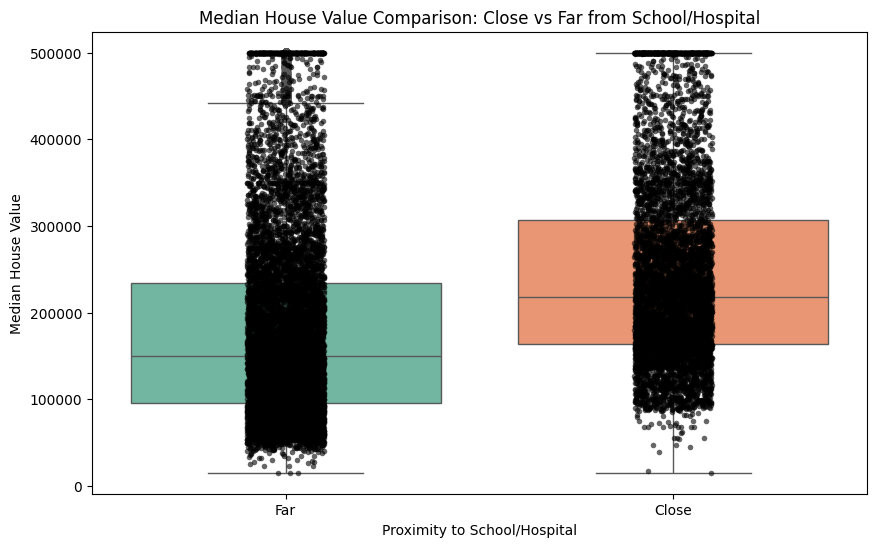

In [44]:
# Visualize the distribution of median house values for close and far houses
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=close_mask, y="median_house_value", palette="Set2")
sns.stripplot(data=df, x=close_mask, y="median_house_value", color="black", size=4, jitter=True, alpha=0.6)
plt.title("Median House Value Comparison: Close vs Far from School/Hospital")
plt.xlabel("Proximity to School/Hospital")
plt.ylabel("Median House Value")
plt.xticks([0, 1], ['Far', 'Close'])
plt.show()